<a href="https://colab.research.google.com/github/nitinvinayak/CV/blob/main/Introduction2DL4CV_dogsvscats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"nitinvnyk","key":"cb7c3502378a70d95ca457a87eb0a353"}'}

In [ ]:
# !mkdir ~/.kaggle
# !cp kaggle.json ~/.kaggle/
# !chmod 600 ~/.kaggle/kaggle.json
# !kaggle competitions download -c dogs-vs-cats
# !unzip -qq dogs-vs-cats.zip
!unzip -qq train.zip
!unzip -qq test1.zip

In [ ]:
import os, shutil, pathlib
original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("cats_vs_dogs_small")

In [ ]:
def make_subset(subset_name, start_index, end_index):
  for category in ("cat", "dog"):
    dir = new_base_dir / subset_name / category
    os.makedirs(dir)
    fnames = [f"{category}.{i}.jpg"
    for i in range(start_index, end_index)]
    for fname in fnames:
      shutil.copyfile(src=original_dir / fname,
      dst=dir / fname)
make_subset("train", start_index=0, end_index=1000)
make_subset("validation", start_index=1000, end_index=1500)
make_subset("test", start_index=1500, end_index=2500)

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
inputs = keras.Input(shape = (180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters = 32, kernel_size = 3, activation = 'relu')(x)
x = layers.MaxPooling2D(pool_size = 2)(x)
x = layers.Conv2D(filters = 64, kernel_size = 3, activation = 'relu')(x)
x = layers.MaxPooling2D(pool_size = 2)(x)
x = layers.Conv2D(filters = 128, kernel_size = 3, activation = 'relu')(x)
x = layers.MaxPooling2D(pool_size = 2)(x)
x = layers.Conv2D(filters = 256, kernel_size = 3, activation = 'relu')(x)
x = layers.MaxPooling2D(pool_size = 2)(x)
x = layers.Conv2D(filters = 256, kernel_size = 3, activation = 'relu')(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation = 'sigmoid')(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model.compile(loss = 'binary_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy'])

In [ ]:
from tensorflow.keras.utils import image_dataset_from_directory
train_dataset = image_dataset_from_directory(
new_base_dir / "train",
image_size=(180, 180),
batch_size=32)
validation_dataset = image_dataset_from_directory(
new_base_dir / "validation",
image_size=(180, 180),
batch_size=32)
test_dataset = image_dataset_from_directory(
new_base_dir / "test",
image_size=(180, 180),
batch_size=32)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath = "convnet_from_scratch.keras",
        save_best_only = True,
        monitor = "val_loss"
    )
]

history = model.fit(
    train_dataset,
    epochs = 30,
    validation_data = validation_dataset,
    callbacks = callbacks
)

Epoch 1/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 240s 4s/step - accuracy: 0.5238 - loss: 0.7004 - val_accuracy: 0.6070 - val_loss: 0.6912
Epoch 2/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 221s 3s/step - accuracy: 0.5319 - loss: 0.6938 - val_accuracy: 0.5230 - val_loss: 0.6843
Epoch 3/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 202s 3s/step - accuracy: 0.5814 - loss: 0.6788 - val_accuracy: 0.6590 - val_loss: 0.6272
Epoch 4/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 259s 3s/step - accuracy: 0.6418 - loss: 0.6416 - val_accuracy: 0.6610 - val_loss: 0.6104
Epoch 5/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 225s 4s/step - accuracy: 0.6910 - loss: 0.6009 - val_accuracy: 0.6540 - val_loss: 0.6186
Epoch 6/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 254s 3s/step - accuracy: 0.7192 - loss: 0.5514 - val_accuracy: 0.7200 - val_loss: 0.5508
Epoch 7/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 270s 4s/step - accuracy: 0.7642 - loss: 0.5118 - val_accuracy: 0.6860 - val_loss: 0.6632
Epoch 8/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 238s 3s/step - accuracy: 0.7683 - loss: 0.4818 - val_accuracy: 0.7290 - v

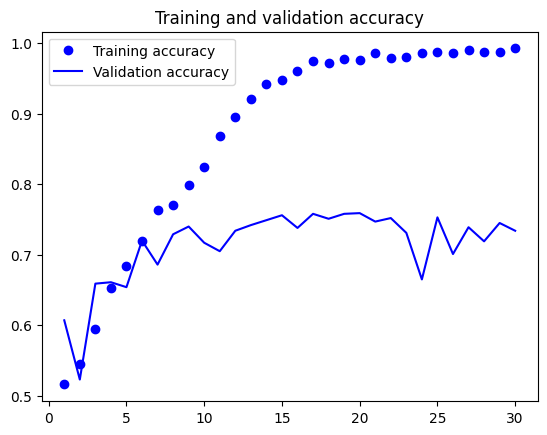

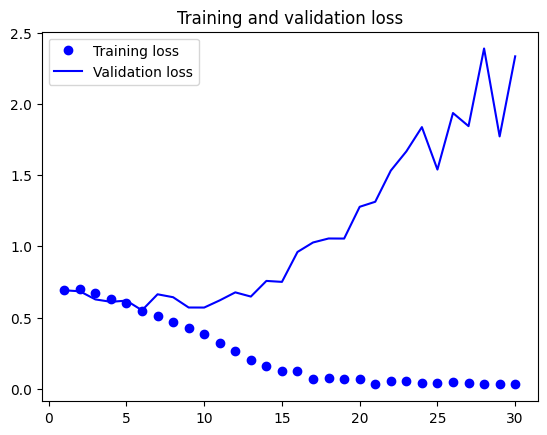

In [ ]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [ ]:
test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")